In [65]:
# SET PATHS

# input data file location
input_path=r'C:\Users\boa\Documents\Repositories_Github\python-ehub\cases\hslu_exercises\input_data.xlsx'

# results saved to text file location
result_file = 'C:/Users/boa/Documents/Repositories_Github/python-ehub/results/hslu_exercises/results.txt'

# model parameters saved to text file location
param_file = 'C:/Users/boa/Documents/Repositories_Github/python-ehub/results/hslu_exercises/params.txt'


In [94]:
# IMPORT SOME STUFF

from run_mod import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# EXECUTE MODEL

run_model(input_path, param_file, result_file) # defined in run_mod.py


Generating model sets...
Generating model variables...
Generating model parameters...
Generating model constraints...
- System constraints
- General technology constraints
- Specific technology constraints
- Network constraints
- Storage constraints
- Carbon constraints
- Cost constraints
Generating custom constraints/model specifications...
Defining objective...
Saving model parameter values to text file...
Preprocessing...
Running solver...
Academic license - for non-commercial use only
Changed value of parameter FeasibilityTol to 1e-05
   Prev: 1e-06  Min: 1e-09  Max: 0.01  Default: 1e-06
No parameters matching 'outlev' found
No parameters matching 'iisfind' found
Optimize a model with 692102 rows, 473073 columns and 1748010 nonzeros
Variable types: 332913 continuous, 140160 integer (140160 binary)
Coefficient statistics:
  Matrix range     [2e-03, 1e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Presolve removed 571549 row

In [ ]:
# LOAD RESULTS DATA

lines = []
with open (result_file, 'rt') as in_file:
    for line in in_file:
        lines.append(line) 
        
capacities = {}
capacities_stor = {}
eout = []
outstg = []
for row in lines:
    if(row.find("TotalCost") >= 0):
        row2 = row.split(sep=" ")
        total_cost = row2[2]
        
    if(row.find("IncomeExp") >= 0):
        row2 = row.split(sep=" ")
        total_income = row2[2]
        
    if(row.find("TotalCarbon") >= 0):
        row2 = row.split(sep=" ")
        total_carbon = row2[2]
    
    if(row.find("CapTech") >= 0):
        row2 = row.split(sep=" ")
        capacities.update({row2[2]: float(row2[3])})
        
    if(row.find("CapStg") >= 0):
        row2 = row.split(sep=" ")
        capacities_stor.update({row2[2]: float(row2[4])})
        
    if(row.find("Eout") >= 0):
        row2 = row.split(sep=" ")
        eout.append(row2[2:6])
        
    if(row.find("OutStg") >= 0):
        row2 = row.split(sep=" ")
        outstg.append(row2[2:6])
        
    if(row.find("Eimp") >= 0):
        row2 = row.split(sep=" ")
        eimp.append(row2[2:5])

capacities['heat_pump'] = capacities['1']
capacities['gas_boiler'] = capacities['2']
capacities['solar_PV'] = capacities['3']
if '4' in capacities:
    capacities['CHP_unit'] = capacities['4']
del capacities['1']
del capacities['2']
del capacities['3']
if '4' in capacities:
    del capacities['4']
    
capacities_stor['battery'] = capacities_stor['1']
capacities_stor['hot_water_tank'] = capacities_stor['2']
del capacities_stor['1']
del capacities_stor['2']

eoutdf = pd.DataFrame(eout, columns = ['tm', 'tech', 'ec', 'value'])
eoutdf = eoutdf.apply(pd.to_numeric)
eoutdf['tech'] = eoutdf['tech'].replace(1, 'heat_pump')
eoutdf['tech'] = eoutdf['tech'].replace(2, 'gas_boiler')
eoutdf['tech'] = eoutdf['tech'].replace(3, 'solar_PV')
eoutdf['tech'] = eoutdf['tech'].replace(4, 'CHP_unit')

stgoutdf = pd.DataFrame(eout, columns = ['tm', 'tech', 'ec', 'value'])
stgoutdf = stgoutdf.apply(pd.to_numeric)
stgoutdf['tech'] = stgoutdf['tech'].replace(1, 'battery')
stgoutdf['tech'] = stgoutdf['tech'].replace(2, 'hot_water_tank')
eoutdf = eoutdf.append(stgoutdf)

eimpdf = pd.DataFrame(eimp, columns = ['tm', 'ec', 'value'])
eimpdf = eimpdf.apply(pd.to_numeric)
eimpdf['tech']='grid'
eoutdf = eoutdf.append(eimpdf)

electricity_production = eoutdf.loc[eoutdf['ec'] == 1]
heat_production = eoutdf.loc[eoutdf['ec'] == 2]

print(total_cost)
print(total_income)
print(total_carbon)
print(capacities)
print(capacities_stor)
print(electricity_production)
        

In [93]:
# TOTAL COSTS, INCOME & CARBON EMISSIONS

print("TOTAL COST (CHF) = " + str(round(float(total_cost))))
print("TOTAL INCOME (CHF) = " + str(round(float(total_income))))
print("TOTAL CARBON EMISSIONS (kg CO2-eq) = " + str(round(float(total_carbon))))

TOTAL COST (CHF) = 2446439
TOTAL INCOME (CHF) = 0
TOTAL CARBON EMISSIONS (kg CO2-eq) = 2247160


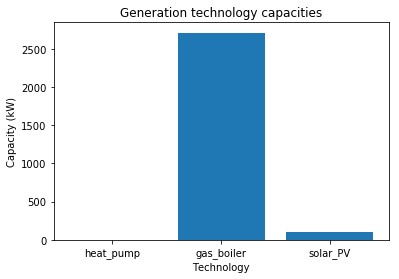

In [108]:
# CONVERSION TECHNOLOGY CAPACITIES

plt.bar(range(len(capacities)), list(capacities.values()), align='center')
plt.xticks(range(len(capacities)), list(capacities.keys()))
plt.xlabel('Technology')
plt.ylabel('Capacity (kW)')
plt.title('Generation technology capacities')
plt.show()


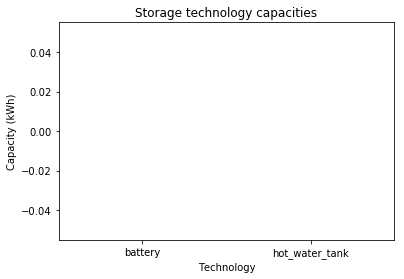

In [110]:
# STORAGE TECHNOLOGY CAPACITIES

plt.bar(range(len(capacities_stor)), list(capacities_stor.values()), align='center')
plt.xticks(range(len(capacities_stor)), list(capacities_stor.keys()))
plt.xlabel('Technology')
plt.ylabel('Capacity (kWh)')
plt.title('Storage technology capacities')
plt.show()


In [ ]:
# ELECTRICITY PRODUCTION - HOURLY RESULTS

electricity_production = electricity_production.loc[eoutdf['tm'] < 100]

#electricity_production.plot.bar(stacked=True);

In [ ]:
# HEAT PRODUCTION - HOURLY RESULTS


In [ ]:
# ELECTRICITY PRODUCTION - AGGREGATED WEEKLY RESULTS


In [ ]:
# HEAT PRODUCTION - AGGREGATED WEEKLY RESULTS
